In [1]:
!pip install tensorflow --user

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.test.is_built_with_cuda()

True

In [5]:
from tensorflow import keras

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    'C://Users//Evgen//Documents//ML//Neural Networks classification melanoma//dataset//train',
    class_mode = 'binary',
    batch_size=32,
    target_size=(150, 150),
    shuffle = True
)

val_generator = train_datagen.flow_from_directory(
    'C://Users//Evgen//Documents//ML//Neural Networks classification melanoma//dataset//test',
    class_mode = 'binary',
    batch_size=32,
    target_size=(150, 150),
    shuffle = True
)

model = keras.Sequential()
model = keras.Sequential([
    keras.Input(shape=(150, 150, 3)),  # Входной слой
    keras.layers.Conv2D(32, (3, 3), activation='relu'), # Сверточный слой, Слой свёртки включает в себя для каждого канала свой фильтр, ядро свёртки которого обрабатывает предыдущий слой по фрагментам
    keras.layers.Dropout(0.3),
    keras.layers.MaxPooling2D(pool_size=(2, 2)), # Объединение слоев
    keras.layers.Flatten(), # Преобразуем массив данных в вектор, https://keras.io/api/layers/reshaping_layers/flatten
    keras.layers.Dense(64, activation='relu'), # Плотный слой, Этот слой обрабатывает каждый элемент предыдущего слоя, выполняя матричное перемножение этих элементов со своими весами
    keras.layers.Dense(1, activation='sigmoid') # Выходной слой, 1 нейрон - число от 0 до 1 (ближе к 0 - dino, ближе к 1 - dragon), список других активаций: https://keras.io/api/layers/activations/
])

opt = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8) # использование оптимайзера
loss = keras.losses.BinaryCrossentropy(from_logits=False)  # https://keras.io/api/losses/probabilistic_losses
model.compile(optimizer=opt, loss=loss, metrics=[keras.metrics.BinaryAccuracy(threshold=0.5)]) # Метрицки оценки нейронной сети
history_1 = model.fit(train_generator, epochs=1, validation_data=val_generator) # тренировка модели на train_ds, и проверка точности на val_ds(папка test)

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 372 steps, validate for 63 steps
372/372 [==============================] - 20s 54ms/step - loss: 0.5353 - binary_accuracy: 0.7191 - val_loss: 0.4912 - val_binary_accuracy: 0.7375


In [21]:
np.mean(history_1.history['val_binary_accuracy'][15:26])

0.8781363

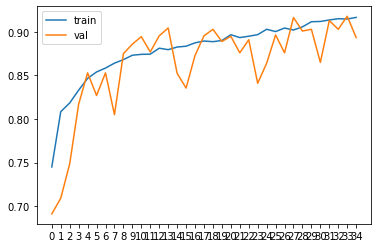

In [22]:
plt.plot(history_1.history['binary_accuracy'], label='train')
plt.plot(history_1.history['val_binary_accuracy'], label='val')
plt.xticks(np.arange(35))
plt.legend()

Корректировка скорости обучения

In [33]:
def make_model(learning_rate=0.001):
    model = keras.Sequential([
        keras.Input(shape=(150, 150, 3)),     
        keras.layers.Conv2D(32, (3, 3), activation='relu'), 
        keras.layers.Flatten(),    
        keras.layers.Dense(64, activation='relu'), 
        keras.layers.Dense(1, activation='sigmoid')
    ])

    opt = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
    loss = keras.losses.BinaryCrossentropy(from_logits=False)
    
    model.compile(optimizer=opt, loss=loss, metrics=[keras.metrics.BinaryAccuracy(threshold=0.5)])

    return model

In [35]:
scores = {}
for lr in [0.0005 ,0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_generator, epochs=20, validation_data=val_generator)
    scores[lr] = history.history

    print()
    print()

0.0005
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 372 steps, validate for 63 steps
Epoch 1/20
372/372 [==============================] - 14s 37ms/step - loss: 0.5429 - binary_accuracy: 0.7122 - val_loss: 0.5274 - val_binary_accuracy: 0.6885
Epoch 2/20
372/372 [==============================] - 13s 35ms/step - loss: 0.4376 - binary_accuracy: 0.7918 - val_loss: 0.4462 - val_binary_accuracy: 0.7555
Epoch 3/20
372/372 [==============================] - 14s 38ms/step - loss: 0.4006 - binary_accuracy: 0.8133 - val_loss: 0.4041 - val_binary_accuracy: 0.8005 loss: 0.4153 - binary_ - ETA: 7s - loss: 0.4113 - binary_a - ETA: 6s - loss: 0.4083 - binary_a 
Epoch 4/20
372/372 [==============================] - 14s 37ms/step - loss: 0.3790 - binary_accuracy: 0.8262 - val_loss: 0.3885 - val_binary_accuracy: 0.8425 loss: 0.3821 - binary_accuracy: - ETA: 4s - loss: 0.3772 - binary_accuracy: 0.828 - ETA: 4s - loss: 0.3773 - binary_ - ETA: 3s - loss: 0.3807 - binary_accuracy: 0.82 - ETA:

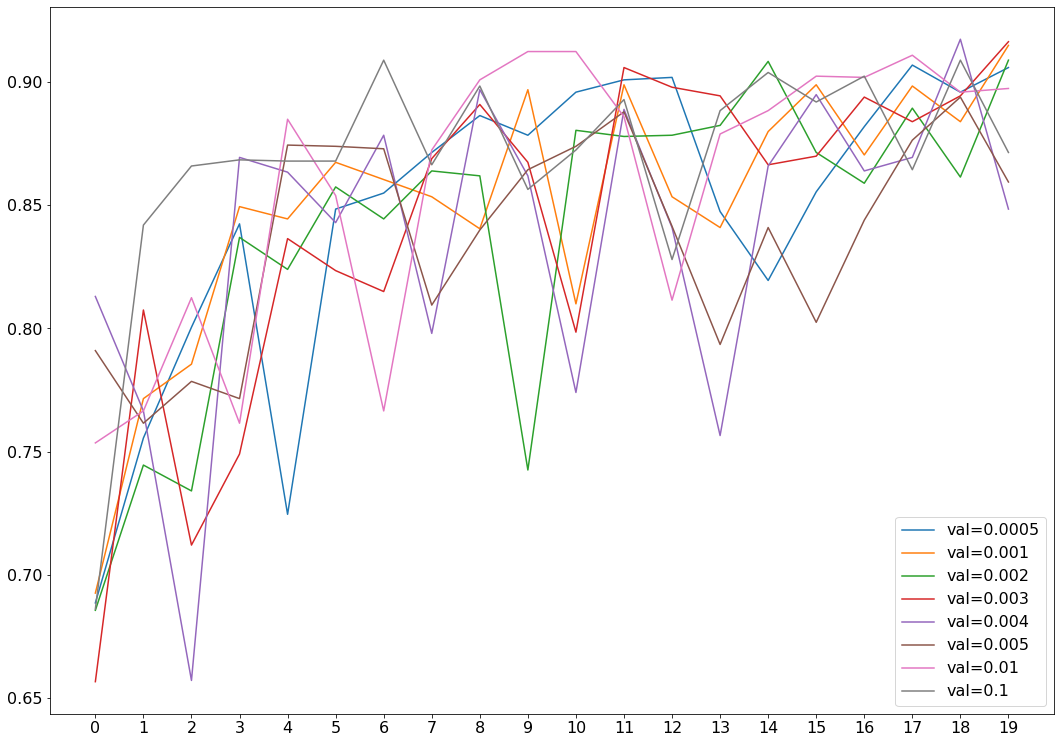

In [36]:
 plt.rcParams.update ({'font.size':16, 'figure.figsize':(18,13)})

for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_binary_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(20))
plt.legend()

The best lr = 0.001  Set and use lr. Compare activation function (Dense layer) between relu & softmax & selu

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    'C://Users//Evgen//Documents//ML//Neural Networks classification melanoma//dataset//train',
    class_mode = 'binary',
    batch_size=32,
    target_size=(150, 150),
    shuffle = True
)

val_generator = train_datagen.flow_from_directory(
    'C://Users//Evgen//Documents//ML//Neural Networks classification melanoma//dataset//test',
    class_mode = 'binary',
    batch_size=32,
    target_size=(150, 150),
    shuffle = True
)

model = keras.Sequential()
model = keras.Sequential([
    keras.Input(shape=(150, 150, 3)),  # Входной слой
    keras.layers.Conv2D(32, (3, 3), activation='relu'), # Сверточный слой, Слой свёртки включает в себя для каждого канала свой фильтр, ядро свёртки которого обрабатывает предыдущий слой по фрагментам
    #keras.layers.Dropout(0.3),
    keras.layers.MaxPooling2D(pool_size=(2, 2)), # Объединение слоев
    keras.layers.Flatten(), # Преобразуем массив данных в вектор, https://keras.io/api/layers/reshaping_layers/flatten
    keras.layers.Dense(64, activation='relu'), # Плотный слой, Этот слой обрабатывает каждый элемент предыдущего слоя, выполняя матричное перемножение этих элементов со своими весами
    keras.layers.Dense(1, activation='sigmoid') # Выходной слой, 1 нейрон - число от 0 до 1 (ближе к 0 - dino, ближе к 1 - dragon), список других активаций: https://keras.io/api/layers/activations/
])

opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.8) # использование оптимайзера
loss = keras.losses.BinaryCrossentropy(from_logits=False)  # https://keras.io/api/losses/probabilistic_losses
model.compile(optimizer=opt, loss=loss, metrics=[keras.metrics.BinaryAccuracy(threshold=0.5)]) # Метрицки оценки нейронной сети
history_1 = model.fit(train_generator, epochs=20, validation_data=val_generator) # тренировка модели на train_ds, и проверка точности на val_ds(папка test)

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 372 steps, validate for 63 steps
Epoch 1/20
372/372 [==============================] - 14s 37ms/step - loss: 0.5457 - binary_accuracy: 0.7150 - val_loss: 0.5147 - val_binary_accuracy: 0.7895
Epoch 2/20
372/372 [==============================] - 13s 36ms/step - loss: 0.4273 - binary_accuracy: 0.7961 - val_loss: 0.4205 - val_binary_accuracy: 0.79304304 - bina - ETA: 0s - loss: 0.4301 - binary_
Epoch 3/20
372/372 [==============================] - 14s 37ms/step - loss: 0.4019 - binary_accuracy: 0.8101 - val_loss: 0.4078 - val_binary_accuracy: 0.8030- loss: 0.3998 - binary_accuracy: 0 - ETA: 8s - loss: 0.4 - ETA: 6s - loss: 0.3961 - binary_accuracy: 0.81 - ETA: 6s - loss: 0.3964 - binary_accuracy: 0.814 - ETA: 6s - loss: 0.3960 - binary_acc - ETA: 5s - loss: 0.3969 - binary_accuracy: 0 - ETA: 5s - l - ETA: 2s - loss: 0.4 - ETA: 1s - loss: 0.4020 -

In [10]:
model = keras.Sequential()
model = keras.Sequential([
    keras.Input(shape=(150, 150, 3)),  # Входной слой
    keras.layers.Conv2D(32, (3, 3), activation='relu'), # Сверточный слой, Слой свёртки включает в себя для каждого канала свой фильтр, ядро свёртки которого обрабатывает предыдущий слой по фрагментам
    #keras.layers.Dropout(0.3),
    keras.layers.MaxPooling2D(pool_size=(2, 2)), # Объединение слоев
    keras.layers.Flatten(), # Преобразуем массив данных в вектор, https://keras.io/api/layers/reshaping_layers/flatten
    keras.layers.Dense(64, activation='selu'), # Плотный слой, Этот слой обрабатывает каждый элемент предыдущего слоя, выполняя матричное перемножение этих элементов со своими весами
    keras.layers.Dense(1, activation='sigmoid') # Выходной слой, 1 нейрон - число от 0 до 1 (ближе к 0 - dino, ближе к 1 - dragon), список других активаций: https://keras.io/api/layers/activations/
])

opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.8) # использование оптимайзера
loss = keras.losses.BinaryCrossentropy(from_logits=False)  # https://keras.io/api/losses/probabilistic_losses
model.compile(optimizer=opt, loss=loss, metrics=[keras.metrics.BinaryAccuracy(threshold=0.5)]) # Метрицки оценки нейронной сети
history_1 = model.fit(train_generator, epochs=20, validation_data=val_generator) # тренировка модели на train_ds, и проверка точности на val_ds(папка test)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 372 steps, validate for 63 steps
Epoch 1/20
372/372 [==============================] - 14s 38ms/step - loss: 0.4877 - binary_accuracy: 0.7605 - val_loss: 0.4858 - val_binary_accuracy: 0.81402 - binary_accuracy: - ETA: 8s - loss: 0.5771 - b - ETA: 0s - loss: 0.4890 - binary_accuracy: 0
Epoch 2/20
372/372 [==============================] - 14s 37ms/step - loss: 0.3903 - binary_accuracy: 0.8211 - val_loss: 0.4194 - val_binary_accuracy: 0.7910.4045 - binary_ - ETA: 8s - loss: 0.3963 - binary_accuracy: 0 - ETA: 7s - loss: 0.3948 - b - ETA: 6s - loss: 0.3938 - binary_accura - ETA: - ETA: 3s - loss: 0.3911 - binary_accurac - ETA: 2s - loss: 0.3927 - binary_accuracy: - ETA: 1s - loss: 
Epoch 3/20
372/372 [==============================] - 14s 37ms/step - loss: 0.3566 - binary_accuracy: 0.8420 - val_loss: 0.4437 - val_binary_accuracy: 0.7685ETA: 1s - loss: 0.3562 - binary_accurac - ETA: 0s - loss: 0.3544 - binary_accuracy
Epoch 4/20
37

The best activation function (Dense layer) - selu

Research Dense inner layer size (256, 128, 64, 32)

In [11]:
def make_model(learning_rate=0.001, size_inner=100):
    model = keras.Sequential([
        keras.Input(shape=(150, 150, 3)),     
        keras.layers.Conv2D(32, (3, 3), activation='relu'), 
        keras.layers.Flatten(),    
        keras.layers.Dense(size_inner, activation='selu'), 
        keras.layers.Dense(1, activation='sigmoid')
    ])

    opt = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
    loss = keras.losses.BinaryCrossentropy(from_logits=False)
    
    model.compile(optimizer=opt, loss=loss, metrics=[keras.metrics.BinaryAccuracy(threshold=0.5)])

    return model

In [14]:
learning_rate=0.001

scores = {}
for size in [140, 128, 100, 80, 64]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_generator, epochs=20, validation_data=val_generator)
    scores[size] = history.history

    print()
    np.mean(history.history['val_binary_accuracy'][6:])
    print()
    print()

140
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 372 steps, validate for 63 steps
Epoch 1/20
372/372 [==============================] - 14s 37ms/step - loss: 0.5858 - binary_accuracy: 0.7193 - val_loss: 0.5485 - val_binary_accuracy: 0.7025- loss: 0.6506 - binary_acc - ETA: 5s - loss: 0.6398 - bin - ETA: 3s - loss: 0.6238 - b - ETA: 2s - loss: 0.6101 - b - ETA: 0s - loss: 0.5938 - binary_a
Epoch 2/20
372/372 [==============================] - 13s 36ms/step - loss: 0.4481 - binary_accuracy: 0.7930 - val_loss: 0.4345 - val_binary_accuracy: 0.81654499 - binary_accuracy: 0.796 - ETA: 5s - loss: 0.4493 - bina - ETA: 4s - loss: 0.4517 - bin 
Epoch 3/20
372/372 [==============================] - 13s 36ms/step - loss: 0.3841 - binary_accuracy: 0.8243 - val_loss: 0.3940 - val_binary_accuracy: 0.7980
Epoch 4/20
372/372 [==============================] - 14s 37ms/step - loss: 0.3577 - binary_accuracy: 0.8400 - val_loss: 0.3319 - val_binary_accuracy: 0.855511s - loss: 0.3239 - binary

The best resoult inner size 140  Epoch 14/20   loss: 0.2763 - binary_accuracy: 0.8790 - val_loss: 0.2508 - val_binary_accuracy: 0.9150 
Need to check again.

In [15]:
model = keras.Sequential()
model = keras.Sequential([
    keras.Input(shape=(150, 150, 3)),  # Входной слой
    keras.layers.Conv2D(32, (3, 3), activation='relu'), # Сверточный слой, Слой свёртки включает в себя для каждого канала свой фильтр, ядро свёртки которого обрабатывает предыдущий слой по фрагментам
    #keras.layers.Dropout(0.3),
    keras.layers.MaxPooling2D(pool_size=(2, 2)), # Объединение слоев
    keras.layers.Flatten(), # Преобразуем массив данных в вектор, https://keras.io/api/layers/reshaping_layers/flatten
    keras.layers.Dense(140, activation='selu'), # Плотный слой, Этот слой обрабатывает каждый элемент предыдущего слоя, выполняя матричное перемножение этих элементов со своими весами
    keras.layers.Dense(1, activation='sigmoid') # Выходной слой, 1 нейрон - число от 0 до 1 (ближе к 0 - dino, ближе к 1 - dragon), список других активаций: https://keras.io/api/layers/activations/
])

opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.8) # использование оптимайзера
loss = keras.losses.BinaryCrossentropy(from_logits=False)  # https://keras.io/api/losses/probabilistic_losses
model.compile(optimizer=opt, loss=loss, metrics=[keras.metrics.BinaryAccuracy(threshold=0.5)]) # Метрицки оценки нейронной сети
history_1 = model.fit(train_generator, epochs=20, validation_data=val_generator) # тренировка модели на train_ds, и проверка точности на val_ds(папка test)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 372 steps, validate for 63 steps
Epoch 1/20
372/372 [==============================] - 14s 38ms/step - loss: 0.4907 - binary_accuracy: 0.7665 - val_loss: 0.4914 - val_binary_accuracy: 0.73308 - binary_accuracy: - ETA: 0s - loss: 0.4978 - binary_accu
Epoch 2/20
372/372 [==============================] - 13s 36ms/step - loss: 0.3918 - binary_accuracy: 0.8210 - val_loss: 0.3816 - val_binary_accuracy: 0.8480
Epoch 3/20
372/372 [==============================] - 13s 36ms/step - loss: 0.3585 - binary_accuracy: 0.8423 - val_loss: 0.3404 - val_binary_accuracy: 0.8635- l - ETA: 8s - loss: 0.3679 - binary_acc - ETA: 7s - loss: 0.3703 - binary_accura - ETA: 6s - loss: 0.3699 - binary_ - ETA: 5s - loss: 0.3672 - binary_accuracy: 0 - ETA: 5s - 
Epoch 4/20
372/372 [==============================] - 14s 36ms/step - loss: 0.3401 - binary_accuracy: 0.8555 - val_loss: 0.3290 - val_binary_accuracy: 0.8700: 2s - loss: 0.3411 - binary_accuracy: 0 

In [ ]:
Check to relu activation

In [16]:
model = keras.Sequential()
model = keras.Sequential([
    keras.Input(shape=(150, 150, 3)),  # Входной слой
    keras.layers.Conv2D(32, (3, 3), activation='relu'), # Сверточный слой, Слой свёртки включает в себя для каждого канала свой фильтр, ядро свёртки которого обрабатывает предыдущий слой по фрагментам
    #keras.layers.Dropout(0.3),
    keras.layers.MaxPooling2D(pool_size=(2, 2)), # Объединение слоев
    keras.layers.Flatten(), # Преобразуем массив данных в вектор, https://keras.io/api/layers/reshaping_layers/flatten
    keras.layers.Dense(140, activation='relu'), # Плотный слой, Этот слой обрабатывает каждый элемент предыдущего слоя, выполняя матричное перемножение этих элементов со своими весами
    keras.layers.Dense(1, activation='sigmoid') # Выходной слой, 1 нейрон - число от 0 до 1 (ближе к 0 - dino, ближе к 1 - dragon), список других активаций: https://keras.io/api/layers/activations/
])

opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.8) # использование оптимайзера
loss = keras.losses.BinaryCrossentropy(from_logits=False)  # https://keras.io/api/losses/probabilistic_losses
model.compile(optimizer=opt, loss=loss, metrics=[keras.metrics.BinaryAccuracy(threshold=0.5)]) # Метрицки оценки нейронной сети
history_1 = model.fit(train_generator, epochs=20, validation_data=val_generator) # тренировка модели на train_ds, и проверка точности на val_ds(папка test)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 372 steps, validate for 63 steps
Epoch 1/20
372/372 [==============================] - 14s 37ms/step - loss: 0.4878 - binary_accuracy: 0.7618 - val_loss: 0.4268 - val_binary_accuracy: 0.79007s - loss: 0.5279 - binary_accuracy:  - ETA: 7s - loss: 0.5287 - binary_accuracy:  - ETA: 6s - loss: 0.5222 -  - ETA: 1s - loss: 0.4975 - binary_accuracy: 0 - ETA: 1s - loss: 0.4955 - b - ETA: 0s - loss: 0.4880 - binary_accuracy: 0.761
Epoch 2/20
372/372 [==============================] - 13s 36ms/step - loss: 0.4165 - binary_accuracy: 0.8067 - val_loss: 0.4077 - val_binary_accuracy: 0.8355- loss: 0.4227 - binary_accuracy: 0.803 - ETA: 2s - los
Epoch 3/20
372/372 [==============================] - 14s 38ms/step - loss: 0.3949 - binary_accuracy: 0.8177 - val_loss: 0.3948 - val_binary_accuracy: 0.82352 - ETA: 8s - loss
Epoch 4/20
372/372 [==============================] - 13s 36ms/step - loss: 0.3729 - binary_accuracy: 0.8308 - val_loss: 0.38

In [17]:
model = keras.Sequential()
model = keras.Sequential([
    keras.Input(shape=(150, 150, 3)),  # Входной слой
    keras.layers.Conv2D(32, (3, 3), activation='relu'), # Сверточный слой, Слой свёртки включает в себя для каждого канала свой фильтр, ядро свёртки которого обрабатывает предыдущий слой по фрагментам
    #keras.layers.Dropout(0.3),
    keras.layers.MaxPooling2D(pool_size=(2, 2)), # Объединение слоев
    keras.layers.Flatten(), # Преобразуем массив данных в вектор, https://keras.io/api/layers/reshaping_layers/flatten
    keras.layers.Dense(140, activation='selu'), # Плотный слой, Этот слой обрабатывает каждый элемент предыдущего слоя, выполняя матричное перемножение этих элементов со своими весами
    keras.layers.Dense(64, activation='selu'), # Плотный слой, Этот слой обрабатывает каждый элемент предыдущего слоя, выполняя матричное перемножение этих элементов со своими весами
    keras.layers.Dense(1, activation='sigmoid') # Выходной слой, 1 нейрон - число от 0 до 1 (ближе к 0 - dino, ближе к 1 - dragon), список других активаций: https://keras.io/api/layers/activations/
])

opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.8) # использование оптимайзера
loss = keras.losses.BinaryCrossentropy(from_logits=False)  # https://keras.io/api/losses/probabilistic_losses
model.compile(optimizer=opt, loss=loss, metrics=[keras.metrics.BinaryAccuracy(threshold=0.5)]) # Метрицки оценки нейронной сети
history_2 = model.fit(train_generator, epochs=20, validation_data=val_generator) # тренировка модели на train_ds, и проверка точности на val_ds(папка test)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 372 steps, validate for 63 steps
Epoch 1/20
372/372 [==============================] - 14s 36ms/step - loss: 0.5269 - binary_accuracy: 0.7584 - val_loss: 0.4187 - val_binary_accuracy: 0.8050.5657 - binary_accurac - ETA: 2s - loss: 0.5562 - binary_accuracy: 0.74 - ETA: 2s - loss: 0.5544 - binary_accur - ETA: 1s - loss: 0.5
Epoch 2/20
372/372 [==============================] - 13s 36ms/step - loss: 0.3694 - binary_accuracy: 0.8326 - val_loss: 0.3421 - val_binary_accuracy: 0.8600: 3s - loss: 0.3766 - binary_accuracy
Epoch 3/20
372/372 [==============================] - 14s 36ms/step - loss: 0.3419 - binary_accuracy: 0.8481 - val_loss: 0.3922 - val_binary_accuracy: 0.8145 - binary_accuracy - ETA: 7s - loss: 0.3372 - binary_accuracy: 0. - ETA: 7s - loss: 0.3380 - binary_accu - ETA: 6s - loss: 0.3383 - binary_accuracy: 0.8 - ETA: 6s - loss: 0.3387 - binary_accuracy: 0. - ETA: 6s - loss: 0.3394 - binary_accura - ETA: 5s - loss
Epoch 

In [18]:
model = keras.Sequential()
model = keras.Sequential([
    keras.Input(shape=(150, 150, 3)),  # Входной слой
    keras.layers.Conv2D(32, (3, 3), activation='relu'), # Сверточный слой, Слой свёртки включает в себя для каждого канала свой фильтр, ядро свёртки которого обрабатывает предыдущий слой по фрагментам
    #keras.layers.Dropout(0.3),
    keras.layers.MaxPooling2D(pool_size=(2, 2)), # Объединение слоев
    keras.layers.Flatten(), # Преобразуем массив данных в вектор, https://keras.io/api/layers/reshaping_layers/flatten
    keras.layers.Dense(140, activation='selu'), # Плотный слой, Этот слой обрабатывает каждый элемент предыдущего слоя, выполняя матричное перемножение этих элементов со своими весами
    keras.layers.Dense(64, activation='selu'), # Плотный слой, Этот слой обрабатывает каждый элемент предыдущего слоя, выполняя матричное перемножение этих элементов со своими весами
    keras.layers.Dense(1, activation='sigmoid') # Выходной слой, 1 нейрон - число от 0 до 1 (ближе к 0 - dino, ближе к 1 - dragon), список других активаций: https://keras.io/api/layers/activations/
])

opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.8) # использование оптимайзера
loss = keras.losses.BinaryCrossentropy(from_logits=False)  # https://keras.io/api/losses/probabilistic_losses
model.compile(optimizer=opt, loss=loss, metrics=[keras.metrics.BinaryAccuracy(threshold=0.5)]) # Метрицки оценки нейронной сети
history_2 = model.fit(train_generator, epochs=25, validation_data=val_generator) # тренировка модели на train_ds, и проверка точности на val_ds(папка test)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 372 steps, validate for 63 steps
Epoch 1/25
372/372 [==============================] - 14s 39ms/step - loss: 0.4689 - binary_accuracy: 0.7834 - val_loss: 0.5183 - val_binary_accuracy: 0.7160 6s - los - ETA: 4s - loss: 0.4922 - binary - ETA: 3s - loss: 0.4873 - binary_accuracy: 0.775 - ETA: 2s - loss: 0. - ETA: 0s - loss: 0.4737 - binary_a
Epoch 2/25
372/372 [==============================] - 13s 36ms/step - loss: 0.3740 - binary_accuracy: 0.8322 - val_loss: 0.3504 - val_binary_accuracy: 0.8455
Epoch 3/25
372/372 [==============================] - 13s 35ms/step - loss: 0.3368 - binary_accuracy: 0.8523 - val_loss: 0.4258 - val_binary_accuracy: 0.7880
Epoch 4/25
372/372 [==============================] - 13s 36ms/step - loss: 0.3224 - binary_accuracy: 0.8627 - val_loss: 0.3580 - val_binary_accuracy: 0.8390
Epoch 5/25
372/372 [==============================] - 13s 35ms/step - loss: 0.3119 - binary_accuracy: 0.8685 - val_loss: 0.38

Test dropout

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    'C://Users//Evgen//Documents//ML//Neural Networks classification melanoma//dataset//train',
    class_mode = 'binary',
    batch_size=32,
    target_size=(150, 150),
    shuffle = True
)

val_generator = train_datagen.flow_from_directory(
    'C://Users//Evgen//Documents//ML//Neural Networks classification melanoma//dataset//test',
    class_mode = 'binary',
    batch_size=32,
    target_size=(150, 150),
    shuffle = True
)

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [9]:
def make_model(droprate=0.5):
    model = keras.Sequential([
        keras.Input(shape=(150, 150, 3)),     
        keras.layers.Conv2D(32, (3, 3), activation='relu'), 
        keras.layers.Dropout(droprate),
        keras.layers.Flatten(),    
        keras.layers.Dense(140, activation='selu'), 
        keras.layers.Dense(64, activation='selu'), 
        keras.layers.Dense(1, activation='sigmoid')
    ])

    opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.8)
    loss = keras.losses.BinaryCrossentropy(from_logits=False)
    
    model.compile(optimizer=opt, loss=loss, metrics=[keras.metrics.BinaryAccuracy(threshold=0.5)])

    return model

In [11]:


scores = {}

for droprate in [ 0.35, 0.4, 0.45]:
    print(droprate)

    model = make_model(droprate=droprate)

    history3 = model.fit(train_generator, epochs=40, validation_data=val_generator)
    scores[droprate] = history3.history

    print()
    print()

0.35
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 372 steps, validate for 63 steps
Epoch 1/40
372/372 [==============================] - 14s 38ms/step - loss: 0.4794 - binary_accuracy: 0.7847 - val_loss: 0.3677 - val_binary_accuracy: 0.8295acy: 0.7 - ETA: 9s - loss: 0.6495 - b - ETA: 7s - - ETA: 4s - loss: 0.5312 - binary_accuracy: 0.7 - ETA: 4s - - ETA: 1s - loss: 0.4962 - binary_accura - ETA: 1s - loss: 0.4889 - binary_accuracy: 0.780 - ETA: 1s - loss: 0.4883 - binary_accuracy: 0.78 - ETA: 0s - loss: 0.4882 - binary_a
Epoch 2/40
372/372 [==============================] - 14s 37ms/step - loss: 0.3603 - binary_accuracy: 0.8416 - val_loss: 0.3470 - val_binary_accuracy: 0.8690
Epoch 3/40
372/372 [==============================] - 14s 37ms/step - loss: 0.3357 - binary_accuracy: 0.8548 - val_loss: 0.3248 - val_binary_accuracy: 0.861535 - - ETA - ETA: 3s - loss: 0.3308 - binary_accuracy: 
Epoch 4/40
372/372 [==============================] - 14s 37ms/step - loss: 0.3265 - bin

Check resoults to 50 epoch

In [12]:
model = keras.Sequential()
model = keras.Sequential([
    keras.Input(shape=(150, 150, 3)),  # Входной слой
    keras.layers.Conv2D(32, (3, 3), activation='relu'), # Сверточный слой, Слой свёртки включает в себя для каждого канала свой фильтр, ядро свёртки которого обрабатывает предыдущий слой по фрагментам
    keras.layers.Dropout(0.35),
    keras.layers.MaxPooling2D(pool_size=(2, 2)), # Объединение слоев
    keras.layers.Flatten(), # Преобразуем массив данных в вектор, https://keras.io/api/layers/reshaping_layers/flatten
    keras.layers.Dense(140, activation='selu'), # Плотный слой, Этот слой обрабатывает каждый элемент предыдущего слоя, выполняя матричное перемножение этих элементов со своими весами
    keras.layers.Dense(64, activation='selu'), # Плотный слой, Этот слой обрабатывает каждый элемент предыдущего слоя, выполняя матричное перемножение этих элементов со своими весами
    keras.layers.Dense(1, activation='sigmoid') # Выходной слой, 1 нейрон - число от 0 до 1 (ближе к 0 - dino, ближе к 1 - dragon), список других активаций: https://keras.io/api/layers/activations/
])

opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.8) # использование оптимайзера
loss = keras.losses.BinaryCrossentropy(from_logits=False)  # https://keras.io/api/losses/probabilistic_losses
model.compile(optimizer=opt, loss=loss, metrics=[keras.metrics.BinaryAccuracy(threshold=0.5)]) # Метрицки оценки нейронной сети
history_new = model.fit(train_generator, epochs=50, validation_data=val_generator) # тренировка модели на train_ds, и проверка точности на val_ds(папка test)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 372 steps, validate for 63 steps
Epoch 1/50
372/372 [==============================] - 15s 41ms/step - loss: 0.4905 - binary_accuracy: 0.7853 - val_loss: 0.5411 - val_binary_accuracy: 0.7585
Epoch 2/50
372/372 [==============================] - 14s 39ms/step - loss: 0.3837 - binary_accuracy: 0.8293 - val_loss: 0.6600 - val_binary_accuracy: 0.5605s: 0.3833 - bina
Epoch 3/50
372/372 [==============================] - 14s 38ms/step - loss: 0.3667 - binary_accuracy: 0.8369 - val_loss: 0.5305 - val_binary_accuracy: 0.735542 -  - ETA: 3s - ETA: 0s - loss: 0.3645 - binary_accuracy: 
Epoch 4/50
372/372 [==============================] - 14s 39ms/step - loss: 0.3522 - binary_accuracy: 0.8453 - val_loss: 0.5500 - val_binary_accuracy: 0.6910- ETA:
Epoch 5/50
372/372 [==============================] - 14s 39ms/step - loss: 0.3358 - binary_accuracy: 0.8553 - val_loss: 0.3920 - val_binary_accuracy: 0.8695  - ETA: 6s - loss: 0.3404 - bi - ET

In [14]:
model = keras.Sequential()
model = keras.Sequential([
    keras.Input(shape=(150, 150, 3)),  # Входной слой
    keras.layers.Conv2D(32, (3, 3), activation='relu'), # Сверточный слой, Слой свёртки включает в себя для каждого канала свой фильтр, ядро свёртки которого обрабатывает предыдущий слой по фрагментам
    keras.layers.Dropout(0.35),
    keras.layers.MaxPooling2D(pool_size=(2, 2)), # Объединение слоев
    keras.layers.Flatten(), # Преобразуем массив данных в вектор, https://keras.io/api/layers/reshaping_layers/flatten
    keras.layers.Dense(140, activation='selu'), # Плотный слой, Этот слой обрабатывает каждый элемент предыдущего слоя, выполняя матричное перемножение этих элементов со своими весами
    keras.layers.Dense(64, activation='selu'), # Плотный слой, Этот слой обрабатывает каждый элемент предыдущего слоя, выполняя матричное перемножение этих элементов со своими весами
    keras.layers.Dense(1, activation='sigmoid') # Выходной слой, 1 нейрон - число от 0 до 1 (ближе к 0 - dino, ближе к 1 - dragon), список других активаций: https://keras.io/api/layers/activations/
])

opt = keras.optimizers.Adam(learning_rate=0.001) # использование оптимайзера
loss = keras.losses.BinaryCrossentropy(from_logits=False)  # https://keras.io/api/losses/probabilistic_losses
model.compile(optimizer=opt, loss=loss, metrics=[keras.metrics.BinaryAccuracy(threshold=0.5)]) # Метрицки оценки нейронной сети
history_new = model.fit(train_generator, epochs=50, validation_data=val_generator) # тренировка модели на train_ds, и проверка точности на val_ds(папка test)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 372 steps, validate for 63 steps
Epoch 1/50
372/372 [==============================] - 15s 39ms/step - loss: 0.7598 - binary_accuracy: 0.7924 - val_loss: 0.4266 - val_binary_accuracy: 0.8680 - ETA: 1s - loss: 0.8014 - bin
Epoch 2/50
372/372 [==============================] - 14s 38ms/step - loss: 0.3526 - binary_accuracy: 0.8436 - val_loss: 0.4356 - val_binary_accuracy: 0.8325
Epoch 3/50
372/372 [==============================] - 14s 38ms/step - loss: 0.3231 - binary_accuracy: 0.8600 - val_loss: 0.3135 - val_binary_accuracy: 0.8935ETA: 6s - loss: 0.3301 - binary_accuracy: 0. - ETA: 5s - l
Epoch 4/50
372/372 [==============================] - 14s 37ms/step - loss: 0.2994 - binary_accuracy: 0.8706 - val_loss: 0.3171 - val_binary_accuracy: 0.8950
Epoch 5/50
372/372 [==============================] - 13s 35ms/step - loss: 0.2763 - binary_accuracy: 0.8804 - val_loss: 0.4157 - val_binary_accuracy: 0.7890 - ETA: 5s - loss: 0.2722 - b

SGD works better then Adam. Check augmentation...

Resoults model with augmentation. 
use: shear_range=10, zoom_range=0.1, horizontal_flip=True
Aborted. Not good.

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.

 
Train for 372 steps, validate for 63 steps
Epoch 1/40
372/372 [==============================] - 53s 142ms/step - loss: 0.4816 - binary_accuracy: 0.7807 - val_loss: 0.5762 - val_binary_accuracy: 0.6755
Epoch 2/40
372/372 [==============================] - 52s 139ms/step - loss: 0.3972 - binary_accuracy: 0.8217 - val_loss: 0.5081 - val_binary_accuracy: 0.7965
Epoch 3/40
372/372 [==============================] - 52s 140ms/step - loss: 0.3823 - binary_accuracy: 0.8301 - val_loss: 0.6092 - val_binary_accuracy: 0.6270
Epoch 4/40
372/372 [==============================] - 52s 140ms/step - loss: 0.3537 - binary_accuracy: 0.8406 - val_loss: 0.4605 - val_binary_accuracy: 0.8290
Epoch 5/40
372/372 [==============================] - 52s 141ms/step - loss: 0.3509 - binary_accuracy: 0.8460 - val_loss: 0.4863 - val_binary_accuracy: 0.7955
Epoch 6/40
372/372 [==============================] - 52s 140ms/step - loss: 0.3421 - binary_accuracy: 0.8494 - val_loss: 0.3787 - val_binary_accuracy: 0.8750
Epoch 7/40
372/372 [==============================] - 56s 152ms/step - loss: 0.3347 - binary_accuracy: 0.8532 - val_loss: 0.4352 - val_binary_accuracy: 0.8420
Epoch 8/40
372/372 [==============================] - 58s 156ms/step - loss: 0.3246 - binary_accuracy: 0.8575 - val_loss: 0.3982 - val_binary_accuracy: 0.8625
Epoch 9/40
372/372 [==============================] - 52s 140ms/step - loss: 0.3215 - binary_accuracy: 0.8583 - val_loss: 0.4574 - val_binary_accuracy: 0.8290
Epoch 10/40
372/372 [==============================] - 52s 140ms/step - loss: 0.3182 - binary_accuracy: 0.8609 - val_loss: 0.4526 - val_binary_accuracy: 0.8140
Epoch 11/40
372/372 [==============================] - 52s 140ms/step - loss: 0.3109 - binary_accuracy: 0.8656 - val_loss: 0.3706 - val_binary_accuracy: 0.8750
Epoch 12/40
245/372 [==================>...........] - ETA: 15s - loss: 0.3086 - binary_accuracy: 0.8635

 Set checkpoints.

In [19]:
model.save_weights('model_melanoma_predict.h5', save_format='h5')
chechpoint = keras.callbacks.ModelCheckpoint(
    'melanoma_v1_{epoch:02d}_{val_binary_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_binary_accuracy',
    mode='max'
)

In [20]:
train_datagen = ImageDataGenerator(rescale=1./255,)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'C://Users//Evgen//Documents//ML//Neural Networks classification melanoma//dataset//train',
    class_mode = 'binary',
    batch_size=32,
    target_size=(224, 224),
    shuffle = True
)

val_generator = train_datagen.flow_from_directory(
    'C://Users//Evgen//Documents//ML//Neural Networks classification melanoma//dataset//test',
    class_mode = 'binary',
    batch_size=32,
    target_size=(224, 224),
    shuffle = True
)

model = keras.Sequential()
model = keras.Sequential([
    keras.Input(shape=(224, 224, 3)), 
    keras.layers.Conv2D(32, (3, 3), activation='relu'), 
    keras.layers.Dropout(0.35),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(), 
    keras.layers.Dense(140, activation='selu'), 
    keras.layers.Dense(64, activation='selu'), 
    keras.layers.Dense(1, activation='sigmoid')
])

opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.8)
loss = keras.losses.BinaryCrossentropy(from_logits=False) 
model.compile(optimizer=opt, loss=loss, metrics=[keras.metrics.BinaryAccuracy(threshold=0.5)]) 
history_new = model.fit(train_generator, epochs=40, validation_data=val_generator, callbacks=[chechpoint]) 

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 372 steps, validate for 63 steps
Epoch 1/40
372/372 [==============================] - 18s 49ms/step - loss: 0.4835 - binary_accuracy: 0.7797 - val_loss: 0.5251 - val_binary_accuracy: 0.7470
Epoch 2/40
372/372 [==============================] - 17s 45ms/step - loss: 0.3804 - binary_accuracy: 0.8303 - val_loss: 0.5746 - val_binary_accuracy: 0.6640
Epoch 3/40
372/372 [==============================] - 18s 48ms/step - loss: 0.3554 - binary_accuracy: 0.8460 - val_loss: 0.4285 - val_binary_accuracy: 0.8330
Epoch 4/40
372/372 [==============================] - 19s 51ms/step - loss: 0.3386 - binary_accuracy: 0.8517 - val_loss: 0.4278 - val_binary_accuracy: 0.8370
Epoch 5/40
372/372 [==============================] - 17s 46ms/step - loss: 0.3247 - binary_accuracy: 0.8587 - val_loss: 0.3336 - val_binary_accuracy: 0.8990
Epoch 6/40
372/372 [============

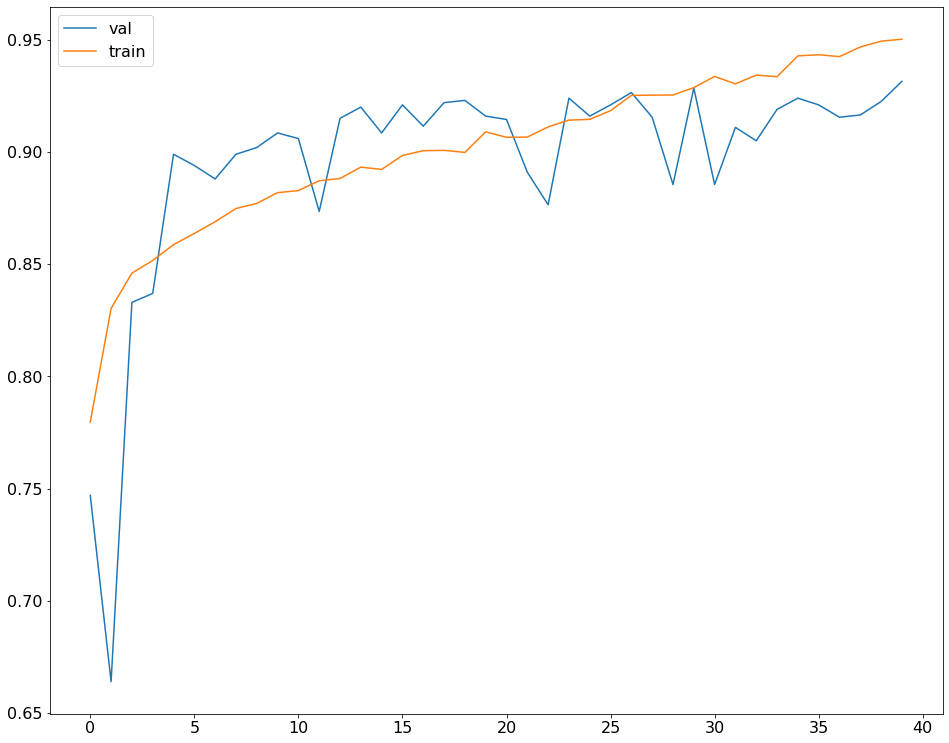

In [22]:
plt.rcParams.update ({'font.size':16, 'figure.figsize':(16,13)})
hist = history_new.history
plt.plot(hist['val_binary_accuracy'], label='val')
plt.plot(hist['binary_accuracy'], label='train')

plt.legend()

Continue training from 40 to 60 epoch

In [23]:
train_datagen = ImageDataGenerator(rescale=1./255,)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'C://Users//Evgen//Documents//ML//Neural Networks classification melanoma//dataset//train',
    class_mode = 'binary',
    batch_size=32,
    target_size=(224, 224),
    shuffle = True
)

val_generator = train_datagen.flow_from_directory(
    'C://Users//Evgen//Documents//ML//Neural Networks classification melanoma//dataset//test',
    class_mode = 'binary',
    batch_size=32,
    target_size=(224, 224),
    shuffle = True
)

model = keras.Sequential()
model = keras.Sequential([
    keras.Input(shape=(224, 224, 3)), 
    keras.layers.Conv2D(32, (3, 3), activation='relu'), 
    keras.layers.Dropout(0.35),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(), 
    keras.layers.Dense(140, activation='selu'), 
    keras.layers.Dense(64, activation='selu'), 
    keras.layers.Dense(1, activation='sigmoid')
])

opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.8)
loss = keras.losses.BinaryCrossentropy(from_logits=False) 
model.compile(optimizer=opt, loss=loss, metrics=[keras.metrics.BinaryAccuracy(threshold=0.5)]) 
history_new = model.fit(train_generator, initial_epoch=40, epochs=60, validation_data=val_generator, callbacks=[chechpoint]) 

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 372 steps, validate for 63 steps
Epoch 41/60
372/372 [==============================] - 17s 46ms/step - loss: 0.5133 - binary_accuracy: 0.7799 - val_loss: 0.4280 - val_binary_accuracy: 0.8475
Epoch 42/60
372/372 [==============================] - 16s 44ms/step - loss: 0.3717 - binary_accuracy: 0.8332 - val_loss: 0.3797 - val_binary_accuracy: 0.8745
Epoch 43/60
372/372 [==============================] - 17s 44ms/step - loss: 0.3405 - binary_accuracy: 0.8535 - val_loss: 0.4064 - val_binary_accuracy: 0.8510
Epoch 44/60
372/372 [==============================] - 17s 44ms/step - loss: 0.3227 - binary_accuracy: 0.8612 - val_loss: 0.3174 - val_binary_accuracy: 0.8960
Epoch 45/60
372/372 [==============================] - 17s 45ms/step - loss: 0.3132 - binary_accuracy: 0.8656 - val_loss: 0.3260 - val_binary_accuracy: 0.8965
Epoch 46/60
372/372 [======

In [24]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
dropout_12 (Dropout)         (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 394272)            0         
_________________________________________________________________
dense_36 (Dense)             (None, 140)               55198220  
_________________________________________________________________
dense_37 (Dense)             (None, 64)                9024      
_________________________________________________________________
dense_38 (Dense)             (None, 1)               

In [25]:
np.mean(history_new.history['val_binary_accuracy'])

0.8996

In [26]:
np.std(history_new.history['val_loss'])

0.046507985724565805

Use model "melanoma"

In [27]:
model_melanoma = keras.models.load_model('C://Users//Evgen//Documents//ML//Neural Networks classification melanoma//melanoma_v1_40_0.932.h5')

In [42]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np

img_path = 'C://Users//Evgen//Documents//ML//Neural Networks classification melanoma//examples/rodinka_noga.jpg'
img = load_img(img_path, target_size=(224, 224))

img_array = np.expand_dims(img, axis=0)
predictions = model_melanoma.predict(img_array)

if predictions[0] < 0.5:
    print("Модель предсказывает класс 0 (Меланомы нет)")
else:
    print("Модель предсказывает класс 1 (Высока вероятность меланомы)")
print ()    
print(predictions[0])

Модель предсказывает класс 0 (Меланомы нет)

[0.25641233]
